In [2]:
import numpy as np
import os
import sys
from pprint import pp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "multrun_results_new_run_trained_on_2_eg/2/total"
path = "FINAL_RESULTS/scenario_2/total"
slice_results = os.listdir(path)

In [4]:
slice_results

['history_0.npz',
 'history_1.npz',
 'history_2.npz',
 'history_3.npz',
 'history_4.npz',
 'history_5.npz',
 'history_6.npz',
 'history_7.npz',
 'history_8.npz',
 'history_9.npz']

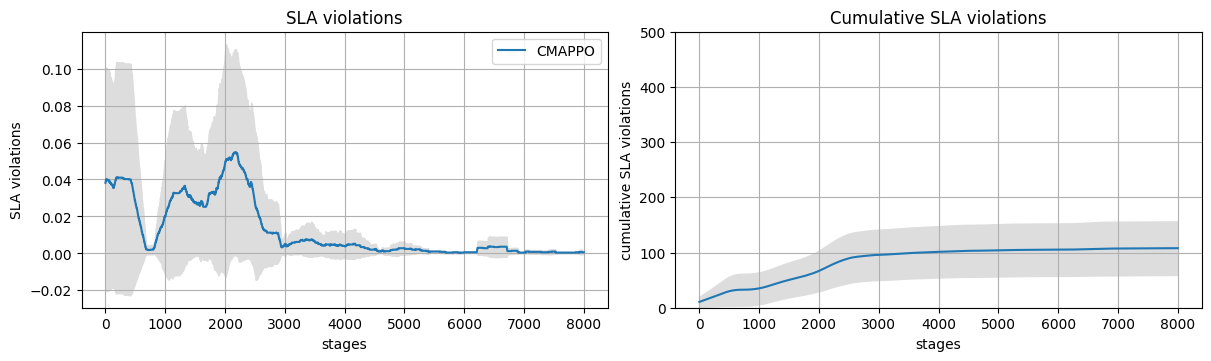

In [9]:
# slice_1 = slice_results[0]
# slice_path = f"{path}/{slice_1}/"
# slice_paths = os.listdir(slice_path)
data = False
actions = None
regret = None
violations = None
WINDOW = 500
histories_list = []
for i,history in enumerate(slice_results):
    histories = np.load(f"{path}/history_{i}.npz")
    histories_list.append(histories)
#     print_histories(histories)
    violations, regret, actions = stackuphistory(histories, data, actions, regret, violations, WINDOW)
    data = True
    
plot_histories(actions, regret, violations)

In [10]:
hist = histories_list[0]
rewards = hist['reward']
violation = hist['violation']
resources = hist['resources']
violation[0]

0.0

In [11]:
rewards[0]

0.00023393874516160158

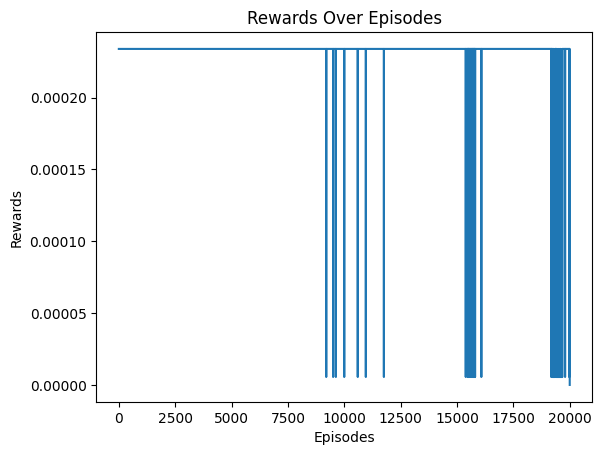

In [12]:
plt.plot(rewards)
plt.title('Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.show()

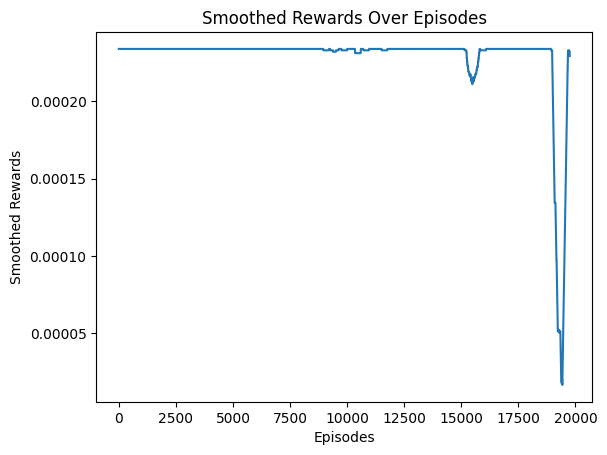

In [25]:
# Calculate the moving average of the rewards
smoothed_rewards = movingaverage(rewards, 250)

# Plot the smoothed rewards
plt.plot(smoothed_rewards)
plt.title('Smoothed Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Smoothed Rewards')
plt.show()

In [129]:
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
violations[0]

In [ ]:
for slice in slice_results:
    slice_path = f"{path}/{slice_1}/"
    slice_paths = os.listdir(slice_path)
    data = False
    actions = None
    regrets = None
    violations = None
    for i,history in enumerate(slice_paths):
        histories = np.load(f"{path}/{slice_1}/history_{i}.npz")
        violations, regret, actions = stackuphistory(histories, data, actions, regrets, violations)
        data = True
    print(actions)
    print(regrets)
    print(violations)
 

In [61]:

# slice_1_results = np.load(f"{path}/{slice_1}/history")

In [34]:
def print_histories(slice_1_results):
    print("violation: ", violations := slice_1_results['violation'])
    print("reward: ", rewards := slice_1_results['reward'])
    print("resources: ", resources := slice_1_results['resources'])
    episodes = np.arange(0, len(slice_1_results['violation']))
    return rewards

In [ ]:
data = pd.DataFrame({
    'Episodes': episodes,
    'Violations': violations,
    'Rewards': rewards,
    'Resources': resources
})

In [ ]:
data.head()

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting Rewards over Episodes
plt.figure(figsize=(1, 8))

# Subplot 1: Rewards over Episodes
# plt.subplot(2, 2, 1)
plt.plot(data['Episodes'], data['Rewards'], color='blue', marker='o', linestyle='-')
plt.title('Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.ylim(0, 1)
plt.show()

# Subplot 2: Bar Plot of Violations
# plt.subplot(2, 2, 2)
sns.countplot(x='Episodes', hue='Violations', data=data, palette='Set1', dodge=True)
plt.title('Violations Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Count of Violations')
plt.legend(title='Violations', loc='upper right', labels=['No Violation (0)', 'Violation (1)'])
plt.show()

# Subplot 3: Scatter Plot of Rewards vs. Resources
# plt.subplot(2, 2, 3)
plt.scatter(data['Resources'], data['Rewards'], alpha=0.6, color='orange')
plt.title('Rewards vs. Resources')
plt.xlabel('Resources')
plt.ylabel('Rewards')
plt.ylim(0, 1)
plt.show()

# Subplot 4: Histogram of Resources
# plt.subplot(2, 2, 4)
sns.histplot(data['Resources'], bins=np.arange(-0.5, 6.5, 1), kde=False, color='green')
plt.title('Distribution of Resources')
plt.xlabel('Resources')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [6]:
def stackuphistory(histories, data, actions, regret, violations, WINDOW):
    _violations = histories['violation']
    _resources = histories['resources']
    # load data for each run
    if not data:
        violations = movingaverage(_violations, WINDOW)
        regret = movingaverage(_violations.cumsum(), WINDOW)
        actions = movingaverage(_resources, WINDOW)
    else: # store the history of each run
        violations = np.vstack((violations, movingaverage(_violations, WINDOW)))
        regret = np.vstack((regret, movingaverage(_violations.cumsum(), WINDOW)))
        actions = np.vstack((actions, movingaverage(_resources, WINDOW)))
    return violations, regret, actions
                   

In [8]:
START = 0
END = 8000
SPAN = END - START
prbs_values = [200, 150, 100]
scenario = 1
scenarios = [0, 1, 2]
label = "CMAPPO"
runs = 10
# actions, regrets, violations = stackuphistory(histories, false)

def plot_histories(actions, regret, violations):
    actions_mean = np.mean(actions, axis=0)
#     print(actions_mean)
    actions_std = np.std(actions, axis=0)
    violations_mean = np.mean(violations, axis=0)
    violations_std = np.std(violations, axis=0)
    regret_mean = np.mean(regret, axis=0)
    regret_std = np.std(regret, axis=0)

    # plot results
    steps = np.arange(len(actions_mean[0:SPAN]))
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.5), constrained_layout=True)

    axs[0].set_title('SLA violations')
    axs[0].plot(steps, violations_mean[0:SPAN], label = label)
    # ax3.fill_between(steps, violations_mean - violations_std, violations_mean + violations_std, color = '#DDDDDD')
    axs[0].fill_between(steps, violations_mean[0:SPAN] - 1.697 * violations_std[0:SPAN] / np.sqrt(runs), 
                    violations_mean[0:SPAN] + 1.697 * violations_std[0:SPAN] / np.sqrt(runs), color = '#DDDDDD')
#     if algo == algo_names[-1]:
    axs[0].set_xlabel('stages')  # Add an x-label to the axes.
    axs[0].set_ylabel('SLA violations')
    axs[0].legend(loc='best')
    axs[0].grid()

    axs[1].set_title('Cumulative SLA violations')
    axs[1].plot(steps, regret_mean[0:SPAN], label = label)
    # ax4.fill_between(steps, regret_mean - regret_std, regret_mean + regret_std, color = '#DDDDDD')
    axs[1].fill_between(steps, regret_mean[0:SPAN] - 1.697 * regret_std[0:SPAN] / np.sqrt(30), 
                    regret_mean[0:SPAN] + 1.697 * regret_std[0:SPAN] / np.sqrt(30), color = '#DDDDDD')
#     if algo == algo_names[-1]:
    axs[1].set_xlabel('stages')  # Add an x-label to the axes.
    axs[1].set_ylabel('cumulative SLA violations')
    axs[1].set_ylim((0,500))
    # axs[1].legend(loc='best')
    axs[1].grid()        

    if START > 0:
        fig.savefig('./figures/_trained_subplots_2_new_{}.png'.format(scenario), format='png')
    else:
        fig.savefig('./figures/subplots_NEW_2_new_{}.png'.format(scenario), format='png')     


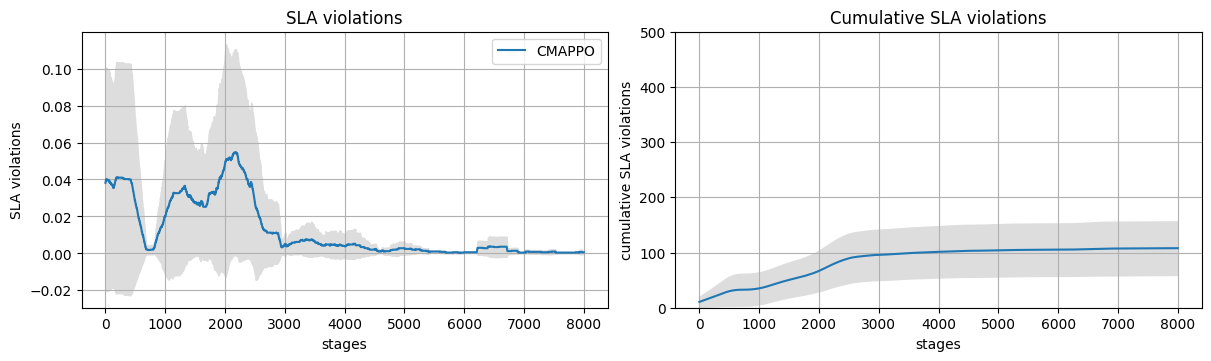

In [14]:
plot_histories(actions, regret, violations)